In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision

# Load Dataset

In [137]:
train_data = torchvision.datasets.MNIST(root = 'mnist', train=True, download=True)
test_data = torchvision.datasets.MNIST(root = 'mnist', train=False, download=True)

# Preprocessing

In [138]:
x_train = (train_data.data)/255.0
y_train = train_data.targets

x_test = (test_data.data)/255.0
y_test = test_data.targets

In [139]:
# change dtype
x_train = x_train.to(torch.float32)
x_test = x_test.to(torch.float32)

y_train = y_train.to(torch.int64)
y_test = y_test.to(torch.int64)

In [140]:
# Normalize dataset
mean = torch.mean(x_train)
std = torch.std(x_train)
x_train = (x_train-mean)/std
x_test = (x_test-mean)/std

#  Data Loader

In [141]:
from torch.utils.data import TensorDataset, DataLoader

In [142]:
train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = TensorDataset(x_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

# Model

In [143]:
import torch.nn as nn

In [144]:
model = nn.Sequential(nn.Linear(28*28, 128), nn.ReLU(), nn.Linear(128, 10))

In [99]:
## chack model with only one batch
# start

In [100]:
imgs , lbls = next(iter(train_loader))

In [101]:
imgs = imgs.reshape(-1, 28*28)

In [102]:
model(imgs).shape
#stop

torch.Size([64, 10])

# Loss & Optimizer

In [111]:
import torch.optim

In [145]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Train Loop

In [146]:
epoch_num = 100
loss_train_hist = []
loss_test_hist = []
                              
for epoch in range(epoch_num):
    
    loss_train = 0
    for images, labels in train_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss_train +=loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    with torch.no_grad():    
        loss_test = 0
        for images, labels in test_loader:
            images = images.reshape(-1,28*28)
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            loss_test+=loss
        
    if epoch%10==0:
        loss_train = loss_train/len(train_loader)
        loss_test = loss_test/len(test_loader)
        loss_train_hist.append(loss_train)
        loss_test_hist.append(loss_test)
        print(f'Epoch:{epoch}    loss_train:{loss_train:.4}    loss_test:{loss_test:.4}')

Epoch:0    loss_train:0.5852    loss_test:0.3202
Epoch:10    loss_train:0.1148    loss_test:0.1171
Epoch:20    loss_train:0.06818    loss_test:0.08493
Epoch:30    loss_train:0.04655    loss_test:0.07538
Epoch:40    loss_train:0.03404    loss_test:0.06945
Epoch:50    loss_train:0.0256    loss_test:0.06741
Epoch:60    loss_train:0.0199    loss_test:0.06543
Epoch:70    loss_train:0.01578    loss_test:0.06691
Epoch:80    loss_train:0.01259    loss_test:0.06605
Epoch:90    loss_train:0.01039    loss_test:0.06554


In [147]:
for i in range(len(loss_train_hist)):
    loss_train_hist[i] = loss_train_hist[i].item()
    loss_test_hist[i] = loss_test_hist[i].item()

In [148]:
epochs = [0,10,20,30,40,50,60,70,80,90]

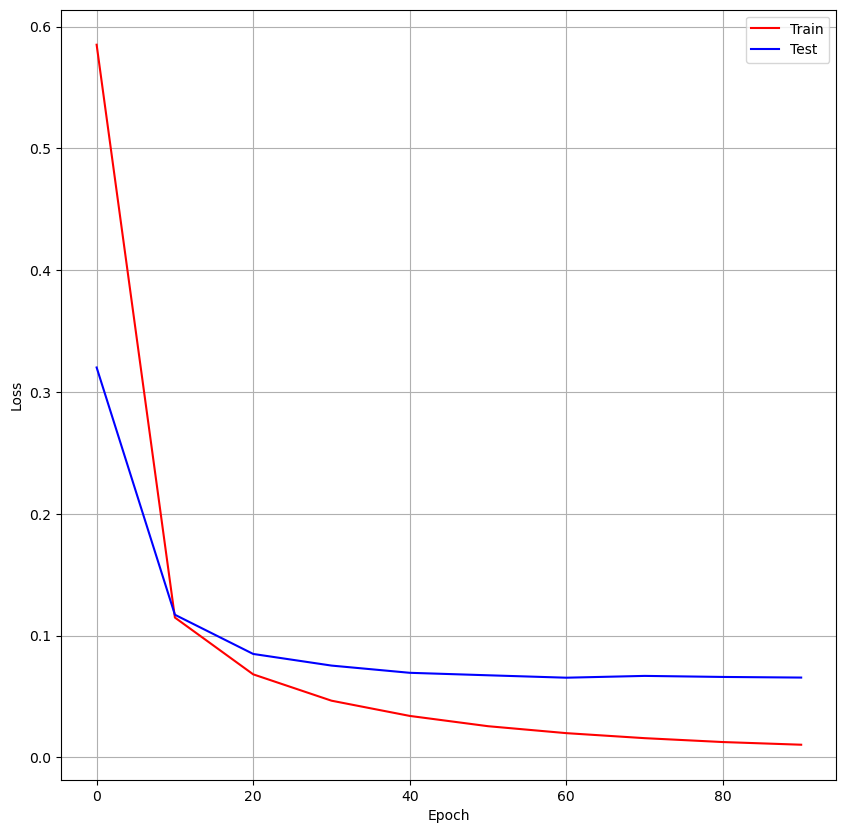

In [149]:
fig, ax = plt.subplots(figsize=(10, 10))


ax.plot(epochs,loss_train_hist, 'r-', label='Train')
ax.plot(epochs,loss_test_hist, 'b-', label='Test')

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.grid(True)
ax.legend()